# Importing necessary libraries

In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sklearn

In [2]:

from sklearn.model_selection import train_test_split

# Define the directory path for each sentiment folder
angry_dir = r'data_folder\angry'
fear_dir = r'data_folder\fear'
happy_dir = r'data_folder\happy'
sad_dir = r'data_folder\sad'

#code primarily taken from Yingbo's lecture
def extract_features(file_path):
    # load audio file
    signal, sample_rate = librosa.load(file_path)

    # audio feature extraction: loudness
    S, phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    df_loudness = pd.DataFrame({'Loudness': rms[0]})

    # audio feature extraction: mel-frequency cepstral coefficients
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    df_mfccs = pd.DataFrame(mfccs.T, columns=[f'MFCC_{i+1}' for i in range(12)])

    # audio feature extraction: zero crossing rate
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_rate = pd.DataFrame({'ZCR': zcr[0]})

    # audio feature extraction: chroma
    chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
    df_chroma = pd.DataFrame(chromagram.T, columns=[f'Chroma_{i+1}' for i in range(12)])

    # audio feature extraction: mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    df_mel_spectrogram = pd.DataFrame(mel_spectrogram.T, columns=[f'Mel_Spectrogram_{i+1}' for i in range(12)])

    # combines everything into a feature matrix
    feature_matrix = pd.concat([df_loudness, df_mfccs, df_zero_crossing_rate, df_chroma, df_mel_spectrogram], axis=1)

    # finds the mean
    feature_matrix = np.mean(feature_matrix.values, axis=0)
    

    return feature_matrix

# Define a function to load the audio files and extract features
def load_data():
    X = []
    y = []
    
    # Load files from angry folder
    for file in os.listdir(angry_dir):
        if file.endswith('.wav'):
            file_path = os.path.join(angry_dir, file)
            feature = extract_features(file_path)
            X.append(feature)
            y.append(0) # 0 represents angry
            
    # Load files from fear folder
    for file in os.listdir(fear_dir):
        if file.endswith('.wav'):
            file_path = os.path.join(fear_dir, file)
            feature = extract_features(file_path)
            X.append(feature)
            y.append(1) # 1 represents fear
            
    # Load files from happy folder
    for file in os.listdir(happy_dir):
        if file.endswith('.wav'):
            file_path = os.path.join(happy_dir, file)
            feature = extract_features(file_path)
            X.append(feature)
            y.append(2) # 2 represents happy
            
    # Load files from sad folder
    for file in os.listdir(sad_dir):
        if file.endswith('.wav'):
            file_path = os.path.join(sad_dir, file)
            feature = extract_features(file_path)
            X.append(feature)
            y.append(3) # 3 represents sad
            
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
    
    return X_train, X_test, y_train, y_test


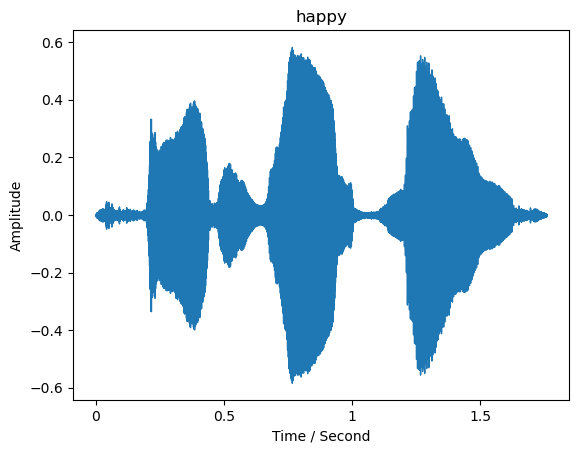

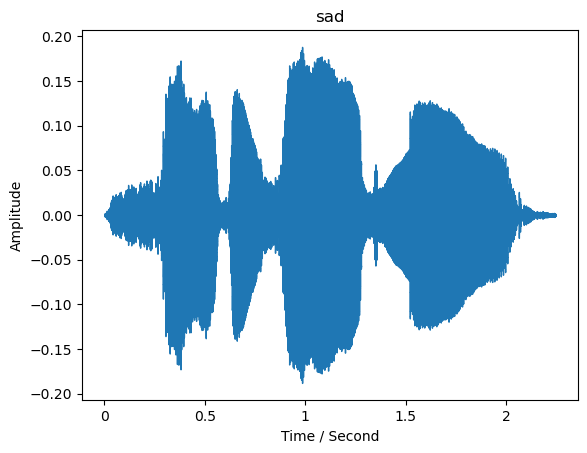

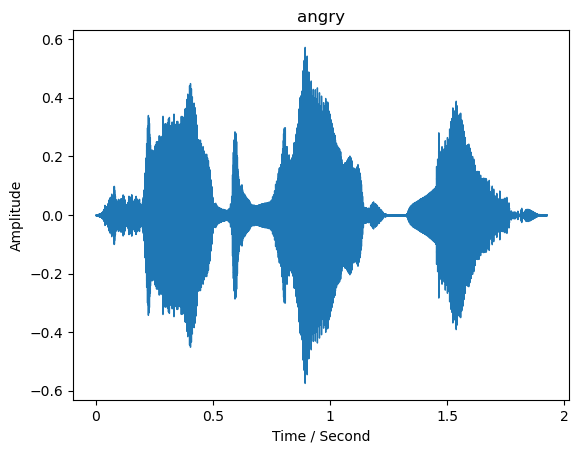

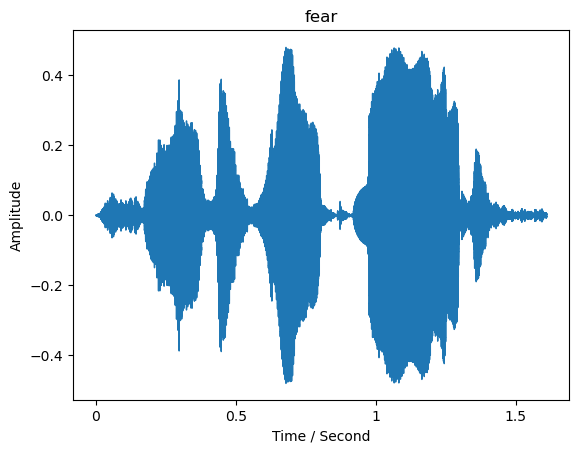

In [3]:
happyS, happyR = librosa.load('data_folder/happy/YAF_mode_happy.wav')
sadS, sadR = librosa.load('data_folder/sad/YAF_mode_sad.wav')
angryS, angryR = librosa.load('data_folder/angry/YAF_mode_angry.wav')
fearS, fearR = librosa.load('data_folder/fear/YAF_mode_fear.wav')


plt.figure(1)
librosa.display.waveshow(y = happyS, sr = happyR)
plt.xlabel('Time / Second')
plt.ylabel('Amplitude')
plt.title("happy")
plt.show()

plt.figure(2)
librosa.display.waveshow(y = sadS, sr = sadR)
plt.xlabel('Time / Second')
plt.ylabel('Amplitude')
plt.title("sad")
plt.show()

plt.figure(3)
librosa.display.waveshow(y = angryS, sr = angryR)
plt.xlabel('Time / Second')
plt.ylabel('Amplitude')
plt.title("angry")
plt.show()

plt.figure(4)
librosa.display.waveshow(y = fearS, sr = fearR)
plt.xlabel('Time / Second')
plt.ylabel('Amplitude')
plt.title("fear")
plt.show()

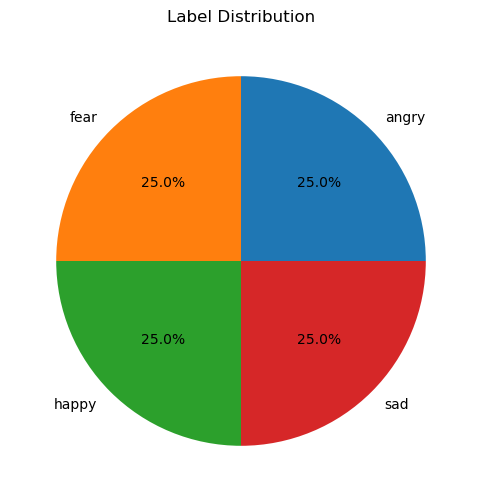

In [4]:

# Load label distribution for the dataset
labels = []
for file in os.listdir(angry_dir):
    if file.endswith('.wav'):
        labels.append('angry')
for file in os.listdir(fear_dir):
    if file.endswith('.wav'):
        labels.append('fear')
for file in os.listdir(happy_dir):
    if file.endswith('.wav'):
        labels.append('happy')
for file in os.listdir(sad_dir):
    if file.endswith('.wav'):
        labels.append('sad')

# Plot label distribution
plt.figure(figsize=(6, 6))
plt.pie([labels.count('angry'), labels.count('fear'), labels.count('happy'), labels.count('sad')],
        labels=['angry', 'fear', 'happy', 'sad'],
        autopct='%1.1f%%')
plt.title('Label Distribution')
plt.show()



In [8]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report
from sklearn.metrics import accuracy_score

# Load the data
X_train, X_test, y_train, y_test = load_data()


# Train an SVM model
model = SVC(kernel='linear', C=1, gamma='scale')
model.fit(X_train, y_train)

# Test the model on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
y_svc_predicted = model.predict(X_test)
print(classification_report(y_test, y_svc_predicted))


0.03399323194728145
Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        37
           1       1.00      0.92      0.96        25
           2       1.00      0.97      0.98        30
           3       1.00      1.00      1.00        28

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.98       120
weighted avg       0.98      0.97      0.98       120



In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=40)
#trains and tests  Random forest model

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
y_rf_predicted = rf_model.predict(X_test)
print(classification_report(y_test, y_rf_predicted))


Accuracy: 0.9916666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.96      1.00      0.98        25
           2       1.00      0.97      0.98        30
           3       1.00      1.00      1.00        28

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
#trains and tests KNC model

knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
y_knn_predicted = knn_model.predict(X_test)
print(classification_report(y_test, y_knn_predicted))

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        37
           1       0.89      0.96      0.92        25
           2       0.97      0.93      0.95        30
           3       1.00      1.00      1.00        28

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



C:\Users\mateu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mateu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim